In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np

from scipy import constants


import time
import math
from scs.utils_opt import *
from scs.supercoeffs import Circuit


pi=np.pi
flux_quantum = constants.physical_constants["mag. flux quantum"][0]
elem_charge = constants.physical_constants["elementary charge"][0]
epsilon_0 =  constants.epsilon_0
h = constants.h
firstrun = True




Lj = 0.391e-9
C_large_jj=0.172e-12   #   10*epsilon_0*area*10**(-12)/1e-9

energy_c_large = (elem_charge)**2/2/C_large_jj/h*1e-9 # GHz
energy_jj = (flux_quantum/(2*pi))**2/Lj/h *1e-9       # GHz
asym_arr = [0.9,0.1]


print(energy_c_large, energy_jj)


0.11261761235266932 418.06013505570627


In [2]:
def set_SQUIDs_params():
    global energy_c_large;
    global energy_jj;
    energy_c_large = (elem_charge)**2/2/C_large_jj/h*1e-9*2.5 # GHz
    energy_jj = (flux_quantum/(2*pi))**2/Lj/h *1e-9       # GHz
    
    
def set_SNAILs_params():
    global energy_c_large;
    global energy_jj;
    energy_c_large = (elem_charge)**2/2/C_large_jj/h*1e-9 # GHz
    energy_jj = (flux_quantum/(2*pi))**2/Lj/h *1e-9       # GHz

# Makes the Kerr-cat model available internally for the Kerr-cat specific methods    
load_or_initialize_kerr_cat_model()

Loaded array for model 'Kerr-cat' from file.


## Kerr-Cat size optimization for $K_{min}=1$ MHz  for SQUIDS

In [12]:
set_SQUIDs_params()
alpha_arr  =  np.linspace(0.05,0.85,51)  # asymmetry coeff
xj_arr = [ 1000.]                        # inductance ratio
x, y = np.meshgrid(alpha_arr,xj_arr)
# Start timer
start_time = time.time()
# Code to be timed
data = []
temp_alpha = alpha_arr[0]
temp_xj = xj_arr[0]
maxorder=-1
phi_ext=0.33
config=1

for m in [3,7,10,11]:
    for n in [1]:
        M=m
        N=n
        model_circuit = Circuit(M, temp_xj, N, temp_alpha, phi_ext, energy_jj, energy_c_large, config, asym_arr=asym_arr, maxorder=maxorder)
        max_size_flux=vmaxSize(model_circuit,x,y)
        max_size = max_size_flux[0]
        data.append(max_size_flux)
#         plt.close()
end_time = time.time()
# Flatten the 3D array
data_np = np.array(data)
flattened_arr = data_np.flatten()

# Write flattened numpy array to a text file
np.savetxt('data_SQUIDs_K_1MHz_phi_ext_test.txt', flattened_arr)
# Calculate elapsed time
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 

Circuit parameters: alpha: 0.05 , xJ: 1000.0 , M: 3 , N: 1
Max size and its phi_ext: 0.5916986306517669 0.27087916666666667
Circuit parameters: alpha: 0.066 , xJ: 1000.0 , M: 3 , N: 1
Max size and its phi_ext: 0.7826518096264888 0.27087916666666667
Circuit parameters: alpha: 0.082 , xJ: 1000.0 , M: 3 , N: 1
Max size and its phi_ext: 0.9739532177241305 0.27087916666666667
Circuit parameters: alpha: 0.098 , xJ: 1000.0 , M: 3 , N: 1
Max size and its phi_ext: 1.1653444544586034 0.27087916666666667
Circuit parameters: alpha: 0.114 , xJ: 1000.0 , M: 3 , N: 1
Max size and its phi_ext: 1.3568595495175602 0.2917083333333333
Circuit parameters: alpha: 0.13 , xJ: 1000.0 , M: 3 , N: 1
Max size and its phi_ext: 1.5535355768835266 0.2917083333333333
Circuit parameters: alpha: 0.14600000000000002 , xJ: 1000.0 , M: 3 , N: 1
Max size and its phi_ext: 1.75098283718442 0.2917083333333333
Circuit parameters: alpha: 0.162 , xJ: 1000.0 , M: 3 , N: 1
Max size and its phi_ext: 1.9489296228847013 0.29170833333

Elapsed time:  4.11424708366394


## Kerr-Cat size mesh for $K_{min}=1$ MHz  for SQUIDS

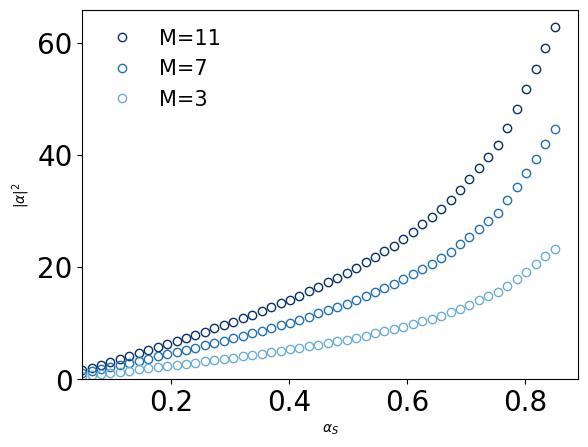

In [15]:
# Read flattened numpy array from the text file and reshape
#Params from https://doi.org/10.1038/s41467-023-44496-1 except number of SQUID in array
cmap = mpl.colormaps['Blues']

path_to_files = ''
arr_shape = (4, 2, 1, 51)#(4, 1, 51)
num=arr_shape[0]
loaded_flattened_arr = np.loadtxt(path_to_files+'data_SQUIDs_K_1MHz_phi_ext_test.txt')
squids_data = loaded_flattened_arr.reshape(arr_shape)
minval = np.min(squids_data[np.nonzero(squids_data)])
maxval = np.max(squids_data[np.nonzero(squids_data)])

cut_index = 51
alpha_arr  = np.linspace(0.05,0.85,51)
x = alpha_arr[0:cut_index]

plt.plot(x, squids_data[3,0,0,0:cut_index],'o', label='M=11',mfc='none',color=cmap(4/num))
plt.plot(x, squids_data[1,0,0,0:cut_index],'o', label='M=7',mfc='none',color=cmap(3/num))
plt.plot(x, squids_data[0,0,0,0:cut_index],'o', label='M=3',mfc='none',color=cmap(2/num))

plt.ylabel(r'$|\alpha|^2$')
plt.xlabel(r'$\alpha_S$')
plt.tick_params(axis='both', labelsize=20)
plt.xlim(0.05,)
plt.ylim(0.,)
leg = plt.legend(loc='upper left',fontsize=15)
leg.get_frame().set_linewidth(0.0)
plt.show()
# plt.savefig('Max_Kerr_cat_sizeSQUIDs_1Mhz.pdf', bbox_inches='tight')

## Kerr-Cat size optimization for $K_{min}=1$ MHz  for SNAILs

In [11]:
set_SNAILs_params()
alpha_arr  = [0.1, 0.13]  # two-photon coupling strength
xj_arr = [ 0.75, 1000.] 
x, y = np.meshgrid(alpha_arr,xj_arr)
# Start timer
start_time = time.time()
# Code to be timed
data = []
temp_alpha = alpha_arr[0]
temp_xj = xj_arr[0]
maxorder=8
phi_ext=0.33
config=0

for m in [1,2,3]:
    for n in [2,3,4,5]:
        
        M=m
        N=n
        model_circuit = Circuit(M, temp_xj, N, temp_alpha, phi_ext, energy_jj, energy_c_large, config, maxorder=maxorder)
        max_size_flux=vmaxSize(model_circuit,x,y)
        max_size = max_size_flux[0]
        data.append(max_size_flux)
        
end_time = time.time()
# Flatten the 3D array
data_np = np.array(data)
flattened_arr = data_np.flatten()

# Write flattened numpy array to a text file
np.savetxt('data_SNAILs_K_1MHz_phi_ext.txt', flattened_arr)
# Calculate elapsed time
elapsed_time = end_time - start_time
print("Elapsed time: ", elapsed_time) 


Circuit parameters: alpha: 0.1 , xJ: 0.75 , M: 1 , N: 2
Max size and its phi_ext: 5.910117654729921 0.4166833333333333
Circuit parameters: alpha: 0.13 , xJ: 0.75 , M: 1 , N: 2
Max size and its phi_ext: 12.67576822596056 0.43491728715368827
Circuit parameters: alpha: 0.1 , xJ: 1000.0 , M: 1 , N: 2
Max size and its phi_ext: 4.32146152629242 0.4166833333333333
Circuit parameters: alpha: 0.13 , xJ: 1000.0 , M: 1 , N: 2
Max size and its phi_ext: 19.23792065321266 0.46205856214104674
Circuit parameters: alpha: 0.1 , xJ: 0.75 , M: 1 , N: 3
Max size and its phi_ext: 29.088851605202493 0.3888196539783345
Circuit parameters: alpha: 0.13 , xJ: 0.75 , M: 1 , N: 3
Max size and its phi_ext: 44.02371444136538 0.4237041559033711
Circuit parameters: alpha: 0.1 , xJ: 1000.0 , M: 1 , N: 3
Max size and its phi_ext: 58.18417192640425 0.3930916013421157
Circuit parameters: alpha: 0.13 , xJ: 1000.0 , M: 1 , N: 3
Max size and its phi_ext: 77.07865353305073 0.4088022114262655
Circuit parameters: alpha: 0.1 , x

## Cat size mesh for $K_{min}=1$ MHz  for SNAILs

In [13]:
# Read flattened numpy array from the text file and reshape
import seaborn as sns
path_to_files = ''
arr_shape = (12, 2, 2, 2)
loaded_flattened_arr = np.loadtxt(path_to_files+'data_SNAILs_K_1MHz_phi_ext.txt')
snail_data_phi_ext = loaded_flattened_arr.reshape(arr_shape)
minval = np.min(snail_data_phi_ext[np.nonzero(snail_data_phi_ext)])
maxval = np.max(snail_data_phi_ext[np.nonzero(snail_data_phi_ext)])
print(minval,maxval)
df = pd.DataFrame(
    np.random.random((3,4)),
    columns=["a","b","c","d"]
)
ys = [1,2,3]

0.25841348438116973 122.15796646921574


### $\alpha_s=0.1$, $x_J=0.75$

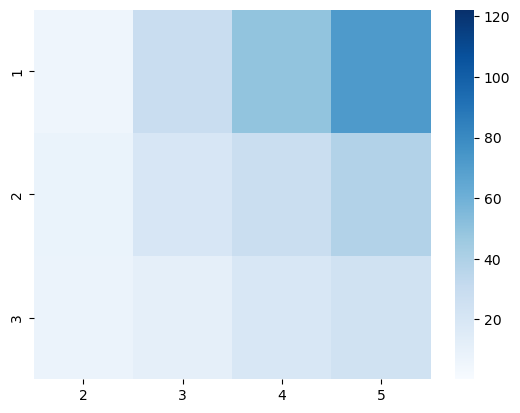

In [9]:
# plot a heatmap with annotation
mesh_data = np.reshape(snail_data_phi_ext[:,0,0,0],(3,4))
df = pd.DataFrame(mesh_data, index=ys, columns=["2","3","4","5"])
if(not firstrun):
    figure.clear()
firstrun = False
svm = sns.heatmap(df, cmap='Blues',vmin=minval,vmax=maxval)
figure = svm.get_figure()    
figure.savefig(path_to_files+'snail_01_xJ_0.75.pdf', bbox_inches='tight')
svm.figure

### $\alpha_s=0.1$, $x_J=1000$

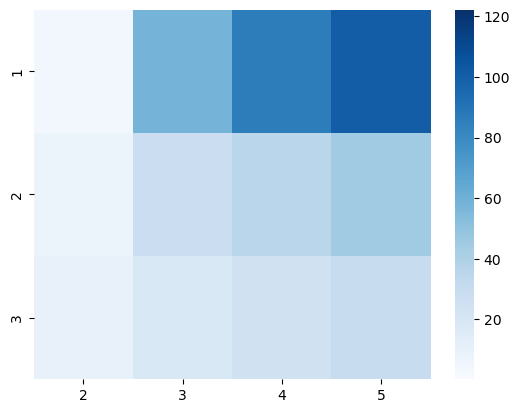

In [10]:
mesh_data = np.reshape(snail_data_phi_ext[:,0,1,0],(3,4))
df = pd.DataFrame(mesh_data, index=ys, columns=["2","3","4","5"])
figure.clear()
svm = sns.heatmap(df, cmap='Blues',vmin=minval,vmax=maxval)
figure = svm.get_figure()    
figure.savefig(path_to_files+'snail_01_xJ_1000.pdf', bbox_inches='tight')
svm.figure

### $\alpha_s=0.13$, $x_J=0.75$

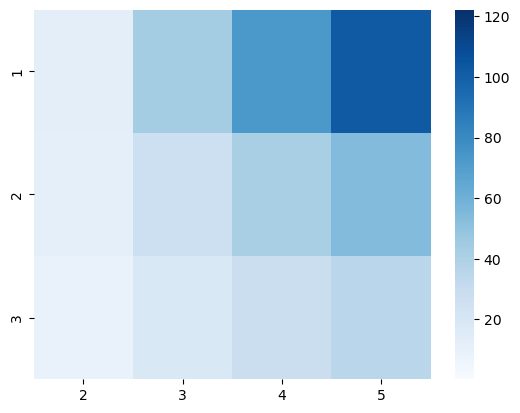

In [10]:
mesh_data = np.reshape(snail_data_phi_ext[:,0,0,1],(3,4))
df = pd.DataFrame(mesh_data, index=ys, columns=["2","3","4","5"])
figure.clear()
svm = sns.heatmap(df, cmap='Blues',vmin=minval,vmax=maxval)
figure = svm.get_figure()    
figure.savefig(path_to_files+'snail_013_xJ_0.75.pdf', bbox_inches='tight')
svm.figure

### $\alpha_s=0.13$, $x_J=1000.$

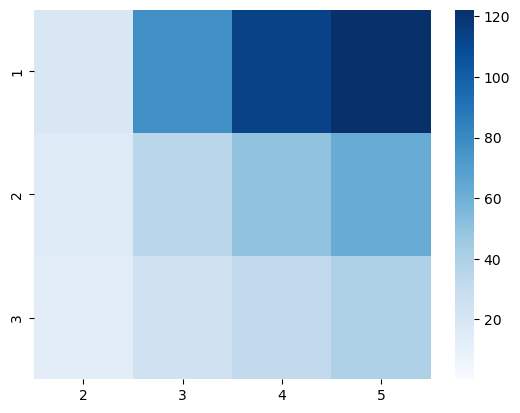

In [11]:
mesh_data = np.reshape(snail_data_phi_ext[:,0,1,1],(3,4))
df = pd.DataFrame(mesh_data, index=ys, columns=["2","3","4","5"])
figure.clear()
svm = sns.heatmap(df, cmap='Blues',vmin=minval,vmax=maxval)
figure = svm.get_figure()    
figure.savefig(path_to_files+'snail_013_xJ_1000.pdf', bbox_inches='tight')
svm.figure